<a href="https://colab.research.google.com/github/Brunour/VentaInmueblesCABA/blob/main/VentaInmueblesCABA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO DETERMINACIÓN PRECIOS DE INMUEBLES EN VENTA LA CIUDAD DE BUENOS AIRES - ARGENTINA



## 1. Preparacion del entorno de trabajo

1.   Carga del Dataset
2.   Carga de Librerias
3.   Pruebas y Vizualizacion de Tablas



In [5]:
# Vincular Google Drive si los archivos con los que se va a trabajar se encuentran alli

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [125]:
# Importar libreria pandas para el manejo del dataset, matplotlib y seaborn para las visualizaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Cargar el archivo .csv desde Google Drive

inmuebles = pd.read_csv('/content/drive/My Drive/inmuebles_buenosaires.csv')

In [65]:
# Mostrar las 5 primeras filas del dataset para dar un poco de contexto de con que se va a trabajar

inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,Comuna,Valor
0,Departamento,Departamento en venta,3,2,70,Villa Devoto,Comuna 11,360000000
1,Casa,Casa en venta,4,3,170,La Boca,Comuna 4,670000000
2,Departamento,Departamento en venta,3,3,144,San Nicolas,Comuna 1,1120000000
3,Departamento,Departamento en venta,3,2,154,Recoleta,Comuna 2,890000000
4,Departamento,Departamento en venta,2,3,128,La Paternal,Comuna 15,970000000


In [66]:
# Ver cantidad de filas y columnas, respectivamente, para verificar la extencion

inmuebles.shape

(9519, 8)

In [67]:
# Nombres de las columnas

inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio',
       'Comuna', 'Valor'],
      dtype='object')

In [68]:
# Informacion del dataset y los tipos de datos que contiene

inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9519 entries, 0 to 9518
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9519 non-null   object
 1   Descripcion   9519 non-null   object
 2   Habitaciones  9519 non-null   int64 
 3   Banos         9519 non-null   int64 
 4   Area          9519 non-null   int64 
 5   Barrio        9519 non-null   object
 6   Comuna        9519 non-null   object
 7   Valor         9519 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 595.1+ KB


In [69]:
# Localizar un registro cualquiera, en este caso el 300, para dar cuenta de la informacion sobre ese inmueble en venta

inmuebles.iloc[300]

,300
Tipo,Departamento
Descripcion,Departamento en venta
Habitaciones,2
Banos,1
Area,42
Barrio,San Telmo
Comuna,Comuna 1
Valor,116100000


In [70]:
inmuebles.iloc[300:305]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,Comuna,Valor
300,Departamento,Departamento en venta,2,1,42,San Telmo,Comuna 1,116100000
301,Departamento,Departamento en venta,2,2,95,Villa Riachuelo,Comuna 8,980000000
302,Departamento,Departamento en venta,3,2,54,Balvanera,Comuna 3,237000000
303,Departamento,Departamento en venta,3,2,67,Parque Avellaneda,Comuna 9,320000000
304,Departamento,Departamento en venta,4,4,132,Villa Santa Rita,Comuna 11,530000000


In [71]:
# Si quiero conocer el valor de un registro en especifico

inmuebles['Valor'][300]

116100000

In [72]:
# Promedio de area  de los inmuebles en venta

inmuebles.Area.mean()

146.67444059249922

In [73]:
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,Comuna,Valor
7842,Departamento,Departamento en venta,3,1,44,Nueva Pompeya,Comuna 4,130000000
5000,Departamento,Departamento en venta,2,3,122,Chacarita,Comuna 15,1450000000
6799,Departamento,Departamento en venta,1,1,58,Boedo,Comuna 5,620000000
6520,Departamento,Departamento en venta,2,2,62,Colegiales,Comuna 13,610000000
2820,Departamento,Departamento en venta,3,2,90,San Nicolas,Comuna 1,425000000
7961,Departamento,Departamento en venta,3,2,47,Balvanera,Comuna 3,150000000
8974,Departamento,Departamento en venta,3,2,109,Mataderos,Comuna 9,549990000
9129,Departamento,Departamento en venta,3,3,128,Floresta,Comuna 10,750000000
4052,Casa,Casa en venta,2,1,40,Villa Real,Comuna 10,134000000
4678,Departamento,Departamento en venta,1,1,22,Martinez,Comuna 13,175000000


In [74]:
# Tabla que muestra los barrios con mas inmubles en venta en orden descendente

inmuebles.Barrio.value_counts()

,count
Barrio,
Agronomia,224
Parque Chacabuco,221
San Nicolas,219
Villa Devoto,216
Parque Chas,216
Flores,215
Villa Ortazar,214
Villa Soldati,214
Villa Crespo,212


In [75]:
# Tomamos de ejemplo Puerto Madero, una de las zonas mas exclusivas de CABA y consultamos la cantidad de inmuebles en venta en la zona

sum((inmuebles.Barrio == 'Puerto Madero'))

210

In [76]:
# Si el comprador esta interesado en alguna comuna en especifico y el barrio le es indistinto, podemos comprobar la cantidad de
# inmuebles en la comuna deseada

sum((inmuebles.Comuna == 'Comuna 2'))

193

In [77]:
# Por ejemplo: se puede armar una nueva variable que contenga todos los inmuebles en venta de un solo barrio
# de una sola comuna o solo de departamentos de un conjunto de barrios, para simplificar o evitar la extencion del analisis
# voy a hacerlo con el barrio de palermo, uno de los mas colicitados pero se puede hacer con cualquiera.

inmuebles_palermo = (inmuebles.Barrio == "Palermo")

inmuebles_palermo = inmuebles[inmuebles_palermo]

inmuebles_palermo

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,Comuna,Valor
103,Departamento,Departamento en venta,3,2,45,Palermo,Comuna 14,217000000
318,Departamento,Departamento en venta,1,1,51,Palermo,Comuna 14,371000000
425,Departamento,Departamento en venta,4,3,90,Palermo,Comuna 14,490000000
437,Departamento,Departamento en venta,3,2,77,Palermo,Comuna 14,316000000
506,Casa,Casa en venta,3,3,141,Palermo,Comuna 14,629000000
...,...,...,...,...,...,...,...,...
9188,Departamento,Departamento en venta,2,1,40,Palermo,Comuna 14,120000000
9218,Departamento,Departamento en venta,4,5,200,Palermo,Comuna 14,1400000000
9327,Departamento,Departamento en venta,5,4,134,Palermo,Comuna 14,810000000
9355,Departamento,Departamento en venta,1,1,51,Palermo,Comuna 14,330000000


In [78]:
# Media del area de los deptos en venta en el barrio de palermo

inmuebles_palermo.Area.mean()

118.55555555555556

In [79]:
# Como se observa la columna Area no se especifica de que unidad de medida se toma, yo se que es en m2 como es comun en nuestro pais
# pero alguien ajeno al proyecto no lo sabe, puede ser en metros, cm etc. no esta claro.
# por eso hay que cambiar el titulo de la columna para que se identifique mejor

inmuebles = inmuebles.rename(columns={"Area": "Area_m2"})

# Verificar que el cambio
print(inmuebles.head())


           Tipo            Descripcion  Habitaciones  Banos  Area_m2  \
0  Departamento  Departamento en venta             3      2       70   
1          Casa          Casa en venta             4      3      170   
2  Departamento  Departamento en venta             3      3      144   
3  Departamento  Departamento en venta             3      2      154   
4  Departamento  Departamento en venta             2      3      128   

         Barrio     Comuna       Valor  
0  Villa Devoto  Comuna 11   360000000  
1       La Boca   Comuna 4   670000000  
2   San Nicolas   Comuna 1  1120000000  
3      Recoleta   Comuna 2   890000000  
4   La Paternal  Comuna 15   970000000  


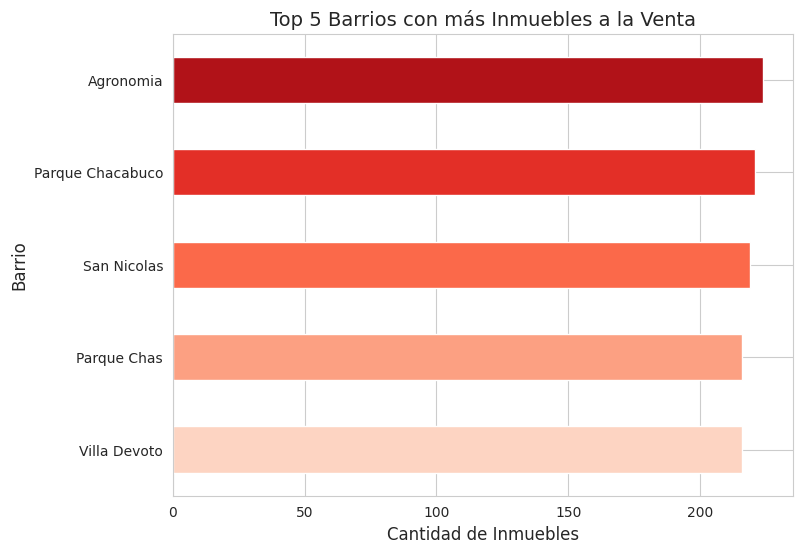

In [80]:
# Grafico de barras con los 5 barrios con mas inmuebles a la venta

# Contar la cantidad de inmuebles por barrio, seleccionar los 5 con más inmuebles y ordenarlos de manera descendente
inmuebles_barrio = inmuebles.Barrio.value_counts().head(5).sort_values(ascending=True)

# Elegir la paleta de colores de seaborn
colors = sns.color_palette("Reds", len(inmuebles_barrio))

# Ajustar el gráfico a horizontal con colores diferentes para cada barra
plt.figure(figsize=(8, 6))
inmuebles_barrio.plot(kind='barh', color=colors)

# Personalizar etiquetas y título
plt.title('Top 5 Barrios con más Inmuebles a la Venta', fontsize=14)
plt.xlabel('Cantidad de Inmuebles', fontsize=12)
plt.ylabel('Barrio', fontsize=12)

plt.show()

## 2.Limpieza y transformacion de datos

In [81]:
# Antes de comenzar a trabajar con numeros, verificamos el tipo de dato de la columna VALOR

print(inmuebles["Valor"].head(10))


0     360000000
1     670000000
2    1120000000
3     890000000
4     970000000
5     510000000
6     500000000
7    2350000000
8     850000000
9     642000000
Name: Valor, dtype: int64


In [82]:
# Como se puede ver los valores son un poco extensos y al estar expresados en usd, parecen mas elevados de lo que son

# Convertir la columna 'Valor' a miles de dólares (dividir por 1000)

inmuebles['Valor'] = inmuebles['Valor'] / 1000

# Convertir la columna 'Valor' a tipo float

inmuebles['Valor'] = inmuebles['Valor'].astype(float)

print(inmuebles["Valor"].head(10))

0    360000.00
1    670000.00
2   1120000.00
3    890000.00
4    970000.00
5    510000.00
6    500000.00
7   2350000.00
8    850000.00
9    642000.00
Name: Valor, dtype: float64


In [83]:
# Prueba de como se ven los nuevos valores de un inmueble al azar. USD 235.000

inmuebles['Valor'][7]

2350000.0

In [84]:
# Funcion para mostrar las estadisticas del dataframe

inmuebles.describe()

,Habitaciones,Banos,Area_m2,Valor
count,9519.00,9519.00,9519.00,9519.00
mean,3.07,2.45,146.67,602090.38
std,2.05,1.26,1731.47,704633.77
min,1.00,0.00,2.00,60000.00
25%,2.00,2.00,57.00,250000.00
50%,3.00,2.00,80.00,409365.00
75%,3.00,3.00,135.00,680000.00
max,110.00,9.00,166243.00,16000000.00


In [85]:
# Ahora vamos a calcular el precio por m2 de cada inmueble expresado en usd para esto vamos a crear una nueva columna en el dataset

inmuebles["Valor_por_m2"] = inmuebles["Valor"] / inmuebles["Area_m2"]

inmuebles.sample()

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,Comuna,Valor,Valor_por_m2
5425,Departamento,Departamento en venta,3,1,47,Villa Lugano,Comuna 8,125000.00,2659.57


In [49]:
# Esto nos muestra el promedio de habitaciones, precio etc. que tienen los inmuebles de cada barrio

inmuebles.groupby("Barrio")

In [86]:
# Creamos un nuevo data frame o variable que contenga el promedio sumado de cada item de los immuebles por barrio

datos_barrio = inmuebles.groupby("Barrio").sum()

datos_barrio.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Comuna,Valor,Valor_por_m2
Barrio,,,,,,,,
Recoleta,DepartamentoDepartamentoDepartamentoDepartamen...,Departamento en ventaDepartamento en ventaDepa...,580,487,26080,Comuna 2Comuna 2Comuna 2Comuna 2Comuna 2Comuna...,127209383.29,960614.00
Balvanera,DepartamentoDepartamentoDepartamentoDepartamen...,Departamento en ventaDepartamento en ventaDepa...,617,497,24409,Comuna 3Comuna 3Comuna 3Comuna 3Comuna 3Comuna...,113984606.35,1029489.72
San Telmo,DepartamentoDepartamentoDepartamentoDepartamen...,Departamento en ventaDepartamento en ventaDepa...,618,480,25792,Comuna 1Comuna 1Comuna 1Comuna 1Comuna 1Comuna...,123232877.25,1002083.11
Saavedra,DepartamentoDepartamentoDepartamentoDepartamen...,Departamento en ventaDepartamento en ventaDepa...,644,513,24743,Comuna 12Comuna 12Comuna 12Comuna 12Comuna 12C...,130665331.77,1067827.10
Flores,DepartamentoDepartamentoDepartamentoDepartamen...,Departamento en ventaDepartamento en ventaDepa...,626,513,25839,Comuna 7Comuna 7Comuna 7Comuna 7Comuna 7Comuna...,131605288.34,1121465.09


In [87]:
# Excluir las columnas Descripcion, Tipo y Comuna antes de realizar la agrupación por que seguramente se van a agrupar todas en una fila desparejamente
# Las columas tipo y descripcion estan enformato string y no son relevantes para el analisis
# Aunque la columna tipo puede ser pasada a bool por ej: 0 = casa; 1 = depto
# Y ser utilizadas en el modelo. segun se necesite pueden o no incluirse, por ahora las quitamos

# Eliminar las columnas 'Tipo' y 'Descripcion' del DataFrame inmuebles

columnas_excluidas = ['Descripcion', 'Tipo', 'Comuna']
inmuebles_sin_desc_tipo = inmuebles.drop(columns=columnas_excluidas)

# Agrupar por 'Barrio' y sumar las columnas restantes

datos_barrio = inmuebles_sin_desc_tipo.groupby("Barrio").sum()

In [89]:
# Ahora vamos a calcular el promedio de valor de metro cuadrado de los inmuebles segun el barrio en el que se encuentra ubicado

datos_barrio["Valor_m2_por_barrio"] = datos_barrio["Valor"]/datos_barrio["Area_m2"]

datos_barrio

,Habitaciones,Banos,Area_m2,Valor,Valor_por_m2,Valor_m2_por_barrio
Barrio,,,,,,
Agronomia,684,550,26676,134798642.92,1123312.73,5053.18
Almagro,576,455,22310,113364667.50,916471.94,5081.34
Balvanera,617,497,24409,113984606.35,1029489.72,4669.78
Barracas,576,446,21696,117491837.00,938090.64,5415.37
Belgrano,569,441,26255,114972077.03,891699.02,4379.05
Boedo,614,498,23859,131272963.38,1044500.24,5502.03
Caballito,645,500,26046,121051784.12,971132.95,4647.62
Chacarita,574,473,24866,116289659.80,918755.64,4676.65
Coghlan,463,393,21264,100428592.13,794766.80,4722.94


In [90]:
# Para poder optimizar las consultas, vamos a convertir barrio en un nueva columna y asignarle un nuevo indice al dataset datos_barrio

datos_barrio.reset_index(inplace = True)

## 3. Carga de dataset de refuerzo sobre informacion socio-economica de la ciudad

In [91]:
# Supongamos que el gobierno a realizado encuestas a los habitantes de los 49 barrios de la ciudad de buenos aires
# Consultando temas relacionados a la infraestructura, seguridad, limpieza, situacion socio-economica de la zona, etc.
# Teniendo los resultados, se ha elaborado un informe (dataset) sobre la calidad de vida de los 49 barrios, asignandole un indice
# A cada barrio sobre los temas tratados
# Esto nos va a servir para empezar a determinar los inmuebles con mejor relacion calida-precio

datos_indec = pd.read_csv("/content/drive/MyDrive/datos_indec.csv")

datos_indec.head()

,NOMBRE_BARRIO,NUMERO_COMUNA,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,NVCBP15F,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,Villa Devoto,Comuna 11,1,2,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,La Boca,Comuna 4,1,2,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,San Nicolas,Comuna 1,2,2,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,Recoleta,Comuna 2,1,2,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,La Paternal,Comuna 15,1,2,2,2,2,1,2,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [92]:
# Como se podra observas, las columas tienen codigos en vez de un nombre o caracteristicas que las identifique con claridad
# Por esto, se creo un diccionario con el nombre/ caracteristica de cada codigo para reemplazar los mismos y que sea mas entendible

dic_indec = {
       'NVCBP4':'CONSORCIO',
       'NVCBP14A':'SUPERMERCADOS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_BOLICHES',
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'CALLES_SUCIAS', 'NVCBP15G':'PLAZA_PARQUE','NVCBP16A3':'MOV_ADULTOS_MAYORES',
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES',
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_INGRESO',
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO',
       'NPCKP64E':'PERDIDA_INGRESOS',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA',
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ROBO', 'NHCLP2B':'VICTIMA_HOMICIDIO',
       'NHCLP2C':'VICTIMA_VANDALISMO',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA',
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_TRABAJO',
       'NHCLP29_1C':'MED_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_ENDEUDAMIENTO',
       'NHCLP29_1F':'MED_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_indec = datos_indec.rename(columns=dic_indec)
datos_indec.columns

Index(['NOMBRE_BARRIO', 'NUMERO_COMUNA', 'CONSORCIO', 'SUPERMERCADOS_CERCA',
       'TERMINALES_BUS', 'BARES_BOLICHES', 'OSCURO_PELIGROSO', 'RUIDO',
       'INSEGURIDAD', 'CALLES_SUCIAS', 'PLAZA_PARQUE', 'MOV_ADULTOS_MAYORES',
       'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO', 'SALARIO_MES',
       'DONDE_TRABAJA', 'DECLARACION_INGRESO', 'VALOR_DECLARACION',
       'PERDIDA_TRABAJO', 'PERDIDA_INGRESOS', 'TIENE_ESCRITURA', 'ANO_COMPRA',
       'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO', 'OTRO_CRED_BANCO', 'CRED_FNA',
       'PRESTAMOS_AMIGOS', 'CESANTIAS', 'AHORROS', 'SUBSIDIOS',
       'CUANTO_PAGARIA_MENSUAL', 'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA',
       'RAZON_NO_ADQ_VIV', 'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS',
       'TIENE_GATOS', 'VICTIMA_ROBO', 'VICTIMA_HOMICIDIO',
       'VICTIMA_VANDALISMO', 'VICTIMA_ACOSO', 'COMO_VIVE_ECON',
       'COMO_NIVEL_VIDA', 'REACCION_OPORTUNA_POLICIA',
       'COMO_TRANSPORTE_URBANO', 'SON_INGRESOS_SUFICIENTES',
       'SE_CONSIDERA_POBRE

In [93]:
# Agrupar y empezar a darle forma al dataset

datos_indec.groupby('NOMBRE_BARRIO')[['CONSORCIO','INSEGURIDAD','TERMINALES_BUS','BARES_BOLICHES','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO','PERDIDA_INGRESOS','PLANES_ADQUIRIR_VIVIENDA']].mean().head()


,CONSORCIO,INSEGURIDAD,TERMINALES_BUS,BARES_BOLICHES,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO,PERDIDA_INGRESOS,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_BARRIO,,,,,,,,,,,
Agronomia,1.51,1.47,1.90,1.91,1.63,1.83,2636132.98,1.09,1.94,1.74,1.89
Almagro,1.50,1.48,1.92,1.91,1.70,1.87,2634902.94,1.10,1.93,1.67,1.87
Balvanera,1.48,1.42,1.95,1.92,1.64,1.89,2512823.19,1.08,1.92,1.68,1.90
Barracas,1.39,1.41,1.88,1.90,1.64,1.83,2672999.98,1.08,1.93,1.70,1.91
Belgrano,1.43,1.46,1.91,1.91,1.69,1.84,2785829.01,1.10,1.91,1.73,1.86


In [94]:
datos = datos_indec[['NOMBRE_BARRIO','CONSORCIO','INSEGURIDAD','TERMINALES_BUS','BARES_BOLICHES','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO','PERDIDA_INGRESOS','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)


In [95]:
datos_tratados = datos.groupby('NOMBRE_BARRIO')[['CONSORCIO','INSEGURIDAD','TERMINALES_BUS','BARES_BOLICHES','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO','PERDIDA_INGRESOS','PLANES_ADQUIRIR_VIVIENDA']].mean()


In [115]:
# Nombre barrio = barrio. ahora vamos a cruzar o conbinar el data set de datos_indec, que contiene informacion de encuestas
# Con el data set de inmuebles, para asi generar el modelo de prediccion

pd.merge(inmuebles, datos_tratados, left_on = "Barrio", right_on = "NOMBRE_BARRIO", how = "left")


,Habitaciones,Banos,Area_m2,Barrio,Comuna,Valor,Valor_por_m2,CONSORCIO,INSEGURIDAD,TERMINALES_BUS,BARES_BOLICHES,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO,PERDIDA_INGRESOS,PLANES_ADQUIRIR_VIVIENDA
0,3,2,70,Villa Devoto,Comuna 11,360000.00,5142.86,0.58,0.54,0.08,0.09,0.38,0.16,2257493.23,0.87,0.06,0.27,0.15
1,4,3,170,La Boca,Comuna 4,670000.00,3941.18,0.48,0.56,0.07,0.10,0.35,0.19,2848553.22,0.90,0.06,0.23,0.13
2,3,3,144,San Nicolas,Comuna 1,1120000.00,7777.78,0.52,0.53,0.07,0.13,0.32,0.13,2448185.70,0.89,0.05,0.29,0.13
3,3,2,154,Recoleta,Comuna 2,890000.00,5779.22,0.52,0.57,0.07,0.09,0.38,0.16,2609371.68,0.87,0.09,0.34,0.16
4,2,3,128,La Paternal,Comuna 15,970000.00,7578.12,0.56,0.58,0.06,0.11,0.37,0.17,2472778.21,0.92,0.08,0.29,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,3,2,70,Retiro,Comuna 1,290000.00,4142.86,0.58,0.58,0.08,0.12,0.34,0.14,2454588.98,0.91,0.06,0.28,0.06
9515,2,2,100,Boedo,Comuna 5,670000.00,6700.00,0.55,0.55,0.10,0.17,0.39,0.19,2226862.62,0.86,0.08,0.24,0.12
9516,8,6,383,Villa Soldati,Comuna 8,900000.00,2349.87,0.56,0.64,0.08,0.10,0.40,0.17,2759089.61,0.91,0.07,0.31,0.11
9517,3,2,183,Liniers,Comuna 9,335000.00,1830.60,0.53,0.60,0.11,0.11,0.34,0.16,2848265.07,0.92,0.10,0.34,0.14


In [116]:
# Almacenamos este nuevo data set en una nueva variable que vamos a utilizar para el modelo de machine learning

datos_ml = pd.merge(inmuebles, datos_tratados, left_on = "Barrio", right_on = "NOMBRE_BARRIO", how = "left")

In [117]:
# Como la columna barrio esta en string y para hacer el modelo de regresion necesitamos valores numericos, vamos a reemplazar estos strings
# por el codigo de identificacion de esas barrio (podria usarse el cpa del correo argentino por ejemplo para identificar mejor la ubicacion)
# yo voy a utilizar codigos aleatorios para simplificar el proyecto, pero tranquilamente se puede mejorar.

codigos_de_barrio = pd.read_csv("/content/drive/MyDrive/cod_barrio.csv")

datos_ml = pd.merge(datos_ml, codigos_de_barrio, left_on = "Barrio", right_on = "NOMBRE_BARRIO", how = "inner")


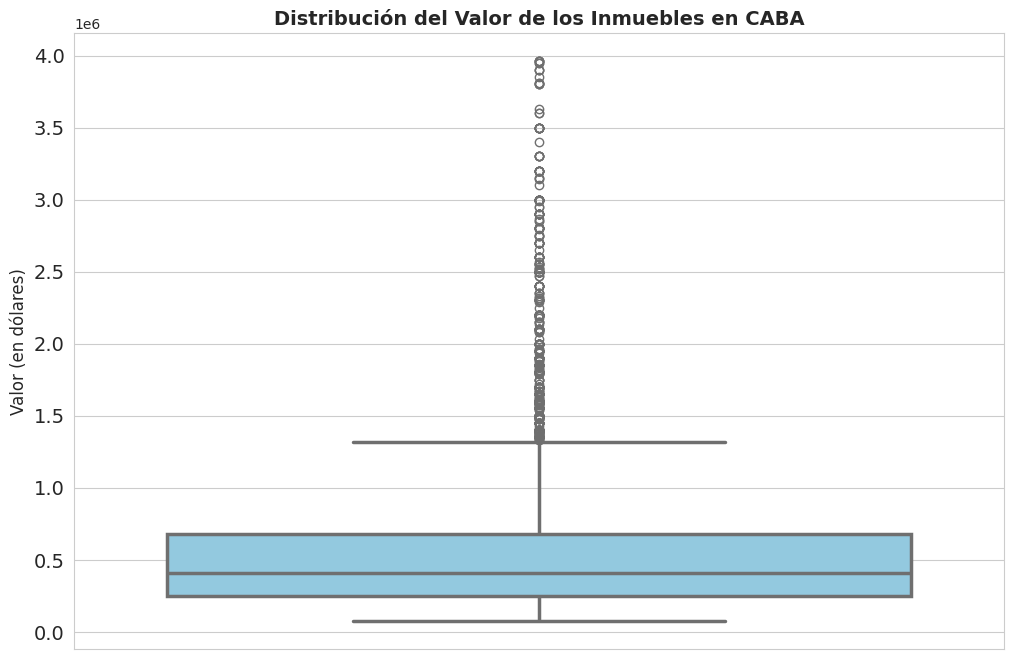

In [114]:
# Cambiar el estilo del gráfico
sns.set_style("whitegrid")

# Crear una figura más grande para mejor visualización
plt.figure(figsize=(12, 8))

# Crear el boxplot con un color personalizado y un ancho de línea más grueso
sns.boxplot(data=datos_ml, y="Valor", color="skyblue", linewidth=2.5)

# Título y etiquetas
plt.title("Distribución del Valor de los Inmuebles en CABA", fontsize=14, weight='bold')
plt.ylabel("Valor (en dólares)", fontsize=12)
plt.xlabel("")  # Dejar en blanco si no hay una etiqueta para el eje x

# Ajustar los ticks (valores en los ejes)
plt.yticks(fontsize=14)

# Mostrar el gráfico mejorado
plt.show()


In [128]:
# Remove outliers, hacemos esto por que hay inmuebles muy por encima de la media y tambien algunos muy por debajo

datos_ml = datos_ml.query('Valor < 4000000 & Valor > 60000')
datos_ml.sample(10)

,Habitaciones,Banos,Area_m2,Barrio,Comuna,Valor,Valor_por_m2,CONSORCIO,INSEGURIDAD,TERMINALES_BUS,...,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO,PERDIDA_INGRESOS,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_BARRIO,COD_BARRIO,SALARIO_ANUAL_USD
6278,2,2,83,Balvanera,Comuna 3,475000.00,5722.89,0.52,0.58,0.05,...,0.36,0.11,2512823.19,0.92,0.08,0.32,0.10,Balvanera,37.00,30153.88
3214,4,5,220,Puerto Madero,Comuna 1,1180000.00,5363.64,0.59,0.56,0.09,...,0.37,0.17,2518814.76,0.88,0.09,0.35,0.09,Puerto Madero,44.00,30225.78
2152,4,4,300,Villa Luro,Comuna 10,1800000.00,6000.00,0.52,0.57,0.07,...,0.39,0.18,2737307.31,0.89,0.07,0.29,0.15,Villa Luro,57.00,32847.69
5577,4,5,280,Villa Real,Comuna 10,1650000.00,5892.86,0.54,0.58,0.12,...,0.39,0.18,2568198.77,0.87,0.10,0.31,0.12,Villa Real,30.00,30818.39
7376,4,4,280,Belgrano,Comuna 13,1200000.00,4285.71,0.57,0.54,0.09,...,0.31,0.16,2785829.01,0.90,0.09,0.27,0.14,Belgrano,816.00,33429.95
8085,3,3,350,Parque Avellaneda,Comuna 9,780000.00,2228.57,0.58,0.55,0.09,...,0.35,0.12,2659542.33,0.92,0.07,0.23,0.12,Parque Avellaneda,98.00,31914.51
4283,3,2,88,Parque Chas,Comuna 15,408000.00,4636.36,0.50,0.54,0.06,...,0.34,0.11,2681997.10,0.86,0.06,0.30,0.13,Parque Chas,807.00,32183.97
281,2,3,87,La Boca,Comuna 4,850000.00,9770.11,0.48,0.56,0.07,...,0.35,0.19,2848553.22,0.90,0.06,0.23,0.13,La Boca,100.00,34182.64
8041,1,1,59,Parque Avellaneda,Comuna 9,390500.00,6618.64,0.58,0.55,0.09,...,0.35,0.12,2659542.33,0.92,0.07,0.23,0.12,Parque Avellaneda,98.00,31914.51
3041,3,2,82,Puerto Madero,Comuna 1,455000.00,5548.78,0.59,0.56,0.09,...,0.37,0.17,2518814.76,0.88,0.09,0.35,0.09,Puerto Madero,44.00,30225.78


In [119]:
# Ademas la columna salario_mes de las personas que viven en cada barrio estan expresadas en pesos y por mes
# Como los precios de los inmuebles estan expresados en USD, tambien vamos a hacer lo mismo con los salarios para un mejor analisis
# Por ello, vamos a crear una nueva columna pero de salario anual, expresado en miles de dolares

datos_ml["SALARIO_ANUAL_USD"] = datos_ml["SALARIO_MES"] * 12/ 1000


## 4. Determinacion de las variables optimas para el modelo de machine learning

Text(0.5, 1.0, 'Correlación de las variables')

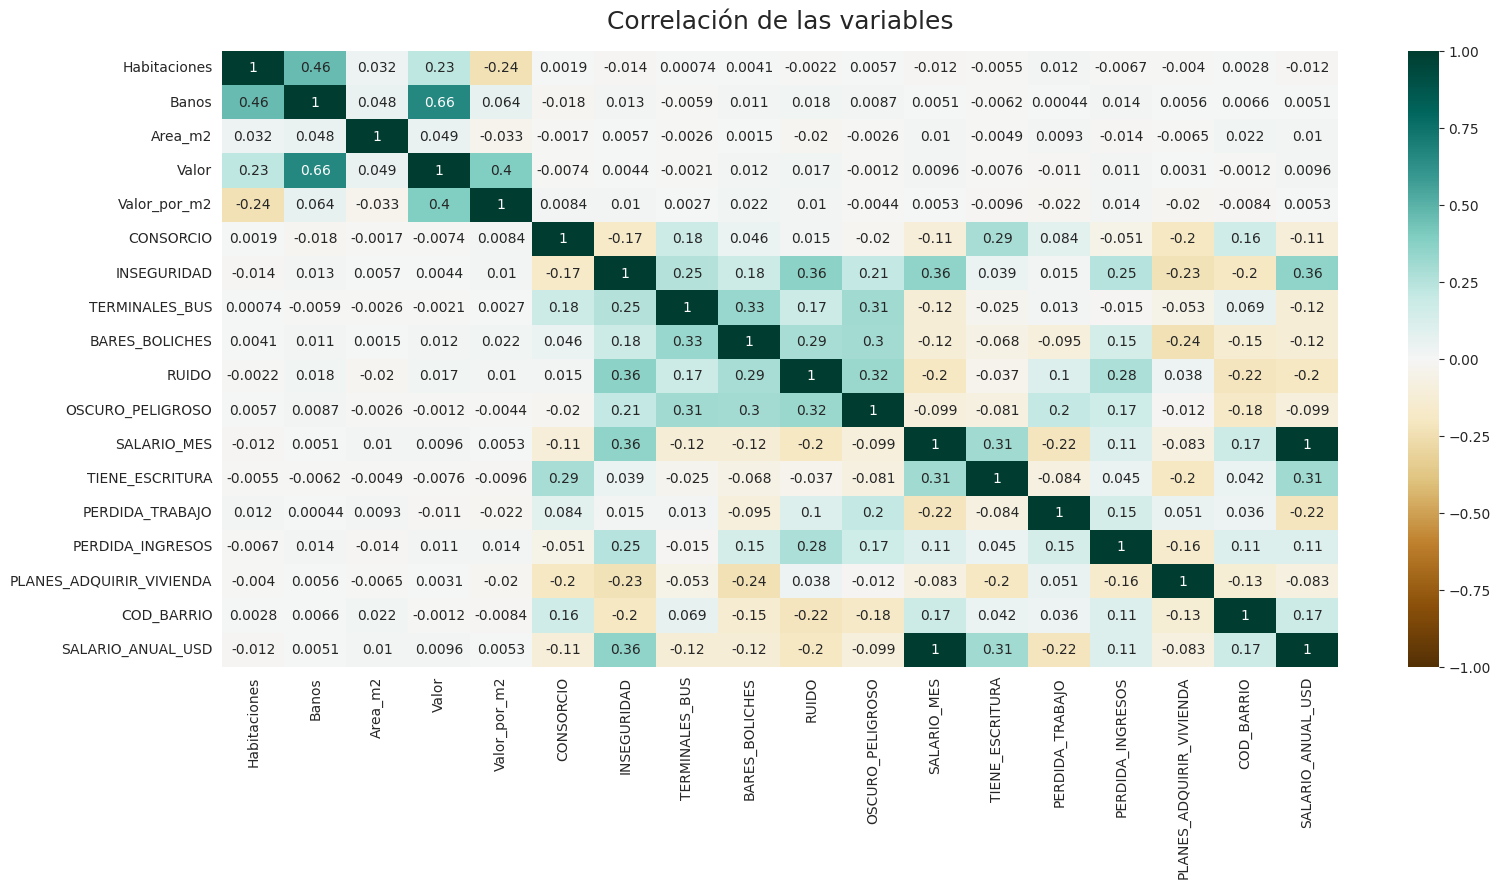

In [127]:
# Para mejorar la visualizacion vamos a implementar un mapa de calor y ademas vamos a ir entrando en tema de machine learning
# Con esto lo que se empieza a intentar determinar es que variables inciden mas y cuales menos en el precio del inmueble

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(datos_ml.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16)

In [130]:
# Comenzamos entonces con machine learnig, importando

from sklearn.linear_model import LinearRegression # paquete de regresion lineal que es lo que vamos a utilizar

from sklearn.model_selection import train_test_split # paquete para entrenar el modelo y luego añadir nuevas metricas

X = datos_ml[["COD_BARRIO"]]

y = datos_ml[["Valor"]]

# Determinamos el split, las variables de entrenamiento y las de prueba, el tamaño del test y aletoriedad del test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [131]:
# Corresponde al 75% de los datos

X_train

,COD_BARRIO
861,109.00
6632,76.00
6329,37.00
366,100.00
545,65.00
...,...
4750,42.00
2019,810.00
228,100.00
2780,73.00


In [132]:
# Corresponde al 25% de los datos

X_test

,COD_BARRIO
5224,74.00
1431,814.00
4118,817.00
553,65.00
7631,71.00
...,...
4338,807.00
7483,816.00
2799,73.00
565,65.00


In [133]:
y_train

,Valor
861,690000.00
6632,370000.00
6329,960000.00
366,470000.00
545,1000000.00
...,...
4750,470000.00
2019,285000.00
228,750000.00
2780,225000.00


In [134]:
y_test

,Valor
5224,850000.00
1431,750000.00
4118,560000.00
553,1490000.00
7631,315000.00
...,...
4338,310000.00
7483,3500000.00
2799,495000.00
565,550000.00


In [135]:
# Sumamos la regresion lineal al analisis

modelo = LinearRegression()

In [136]:
# Ajustamos el modelo

modelo.fit(X_train, y_train)

LinearRegression()

In [137]:
# Con el paso anterior, el modelo ya esta entrenado, ya fue aplicado el modelo de machine learnig en si y ahora toca validar este modelo y/o los datos y variables
# Ahora vamos a predecir para luego comparar o verificar con si lo predecido esta igual o similar a lo real para comprobar la efectividad del modelo -------- y_test & y_train

y_predict = modelo.predict(X_test)

In [138]:
# Comienza la parte de la validacion, aplicando metricas o indicadores (error absoluto medio y r2) para conocer el desempeño del modelo
# Error absoluto medio = error o margen de error esperado de la prediccion del modelo (mientras mas bajo mejor)
# r2 = coeficiente de determinacion, mientras mas cerca de 1, significa que el modelo ajusta correctamente (tiene buenas variables/informacion para predecir)

from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict) # compara lo predecido por el modelo de machine learning y con el conjunto de datos que no fueron introducidos al modelo

baseline_r2 = r2_score(y_test, y_predict)

In [139]:
# Estos indicadores muestran que el modelo no esta ajustando ni se esta desempeñando de la mejor manera

print(baseline_mae, baseline_r2)

341769.12157219375 2.840578829599316e-06


In [140]:
# Hay que agregar mas variables que sean de mejor calidad para intentar ajustar mas el modelo

X = datos_ml[['COD_BARRIO','Habitaciones','Banos', 'CONSORCIO','SALARIO_ANUAL_USD','TIENE_ESCRITURA']]

Y = datos_ml["Valor"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

modelo_2 = LinearRegression()

modelo_2.fit(X_train, y_train)

y_predict_test = modelo_2.predict(X_test)

y_predict_train = modelo_2.predict(X_train)

mae_test_2 = mean_absolute_error(y_test, y_predict_test)

r2_test_2 = r2_score(y_test, y_predict_test)

mae_train_2 = mean_absolute_error(y_train, y_predict_train)

r2_train_2 = r2_score(y_train, y_predict_train)

print(mae_test_2,r2_test_2)

print(mae_train_2,r2_train_2)

222854.50049815868 0.41723654176537806
225014.89563958358 0.4567069816893512


In [141]:
# Ahora el modelo ajusta mas, con una confianza de prediccion mas alta
# Ponemos a prueba el modelo, dandole informacion de las variables reelevantes para estimar el precio de un
# Inmueble en cod_barrio 44(puerto madero) con 3 habitaciones, 2 baños, en consorcio, la persona gana USD 3000 al año y tiene escritura

modelo_2.predict([[816,3,2,1,3000,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[406499.44385319]])

## El costo del inmueble con esas caracteristicas es de USD 406.499,44

In [145]:
# Probamos consultando en una zona mas economica, cod_barrio 73 (villa riachuelo) con 1 habitacion, 1 baño, en consorcio,
# la persona gana USD 1000 al año y tiene escritura

modelo_2.predict([[73,1,1,1,1000,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[151719.58149749]])

## El costo del inmueble con esas caracteristicas es de USD 151.719,58